In [1]:
import pandas as pd
from datetime import datetime

In [2]:
trayectos = pd.read_csv("trayectos.csv", index_col=0)
trayectos['Hora_salida'] = pd.to_datetime(trayectos['Hora_salida'], format='%H:%M')
trayectos['Hora_llegada'] = pd.to_datetime(trayectos['Hora_llegada'], format='%H:%M')

In [3]:
prueba = trayectos[trayectos["Nombre_rutina"].str.contains("prueba")]

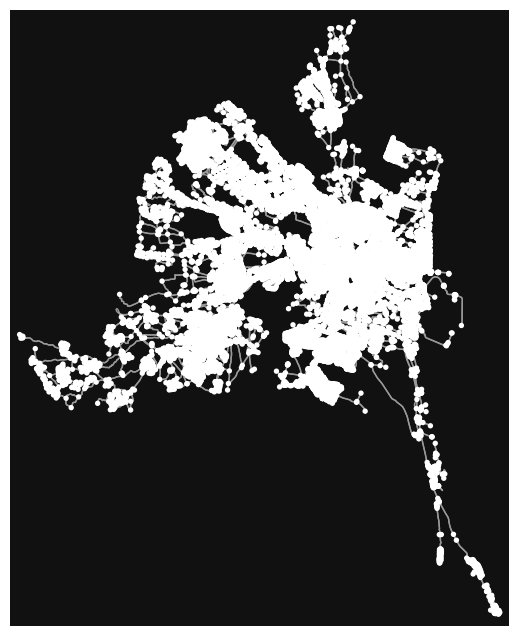

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [4]:
import osmnx as ox
import networkx as nx

lugares = ["Valencia, Spain", "Catarroja, Spain", "Torrent, Spain", "Alboraya, Spain", "Moncada, Spain", "Manises, Spain",
          "Tavernes Blanques, Spain", "Meliana, Spain", "Burjasot, Spain", "Paterna, Spain", "Mislata, Spain",
          "Alaquàs, Spain", "Xirivella, Spain", "Paiporta, Spain", "Alfafar, Spain", "Benetúser, Spain", "Sedaví, Spain",
          "Aldaya, Spain", "Quart de Poblet, Spain"]

# Crear un diccionario para almacenar los grafos de cada lugar
grafos_por_lugar = {}

# Obtener el grafo de carreteras para cada lugar y almacenarlo en el diccionario
for lugar in lugares:
    grafo_lugar = ox.graph_from_place(lugar, network_type="drive")
    grafos_por_lugar[lugar] = grafo_lugar

grafo = nx.compose_all(grafos_por_lugar.values())

ox.plot_graph(grafo)

In [5]:
trayectos

,Nombre_rutina,Id_usuario,Lugar_salida,Lugar_llegada,Hora_salida,Hora_llegada,Motivo,Dia,Disponibilidad_coche,Viejo_trayecto
0,[Indefinido]_lunes,111831,"39.50122800718866, -0.41927966292614793","39.44984907483212, -0.3923317810900036",1900-01-01 13:50:00,1900-01-01 14:12:00,Otro,Lunes,Pasajero,Tren
1,Estudios_universidad_miercoles,982437,"39.47448582694143, -0.36973136061629475","39.52827350270283, -0.3752537306405829",1900-01-01 07:00:00,1900-01-01 07:24:00,Estudios,Miercoles,Coche y pasajero,Tren
2,Deporte_futbol_miercoles,220786,"39.487288123748414, -0.3832181679770428","39.46320872584864, -0.378861657627463",1900-01-01 14:15:00,1900-01-01 14:25:00,Deporte,Miercoles,Pasajero,Bus
3,Deporte_tenis_viernes,362659,"39.464666255889306, -0.378869876395067","39.48122685723318, -0.357178565188734",1900-01-01 15:25:00,1900-01-01 15:35:00,Deporte,Viernes,Coche y pasajero,Coche
4,Ocio_viernes,693935,"39.41972386577771, -0.3892850451039514","39.45630189278762, -0.3795688513211948",1900-01-01 07:50:00,1900-01-01 08:09:00,Ocio,Viernes,Coche,Tren
...,...,...,...,...,...,...,...,...,...,...
69995,prueba_6,156939,"39.478350, -0.347192","39.404948, -0.406213",1900-01-01 07:25:00,1900-01-01 08:00:00,Trabajo,Lunes,Coche y pasajero,Coche
69996,prueba_7,156939,"39.478350, -0.347192","39.404948, -0.406213",1900-01-01 07:25:00,1900-01-01 07:50:00,Trabajo,Lunes,Coche y pasajero,Coche
69997,prueba_8,156939,"39.478350, -0.347192","39.404948, -0.406213",1900-01-01 07:25:00,1900-01-01 07:55:00,Trabajo,Lunes,Coche y pasajero,Coche
69998,prueba_9,156939,"39.478350, -0.347192","39.404948, -0.406213",1900-01-01 07:25:00,1900-01-01 07:55:00,Trabajo,Lunes,Coche,Coche


In [6]:
trayectos.Lugar_llegada

0        39.44984907483212, -0.3923317810900036
1        39.52827350270283, -0.3752537306405829
2         39.46320872584864, -0.378861657627463
3         39.48122685723318, -0.357178565188734
4        39.45630189278762, -0.3795688513211948
                          ...                  
69995                      39.404948, -0.406213
69996                      39.404948, -0.406213
69997                      39.404948, -0.406213
69998                      39.404948, -0.406213
69999                      39.404948, -0.406213
Name: Lugar_llegada, Length: 70000, dtype: object

In [19]:
from datetime import timedelta
import geopy.distance
import numpy as np

def match(df, fila):
    #seleccionar las rutas que sean del mismo día
    dia = df.at[fila, 'Dia']
    match_dia = df[df['Dia'] == dia]
    
    #si la ruta es "Pasajero", descartar las rutas que también sean "Pasajero"
    coche = df.at[fila, 'Disponibilidad_coche']
    if coche == "Pasajero":
        match_dia = match_dia[~(match_dia['Disponibilidad_coche'] == "Pasajero")]
      
    #seleccionar las rutas que difieran menos de 45min de salir o llegar
    tolerance = timedelta(minutes=30)
    hora_llegada_fila = df.loc[fila, 'Hora_llegada']
    hora_salida_fila = df.loc[fila, 'Hora_salida']
    match_dia = match_dia[abs(hora_llegada_fila - match_dia['Hora_llegada']) <= tolerance]
    match_dia = match_dia[abs(hora_salida_fila - match_dia['Hora_salida']) <= tolerance]

    
    #calcular las distancias de salida y de llegada con el resto de filas con el grafo
    destino_fila = df.at[fila, 'Lugar_llegada']
    destino_fila = ox.distance.nearest_nodes(grafo, float(destino_fila.split(', ')[1]), float(destino_fila.split(', ')[0]))
    salida_fila = df.at[fila, 'Lugar_salida']
    salida_fila = ox.distance.nearest_nodes(grafo, float(salida_fila.split(', ')[1]), float(salida_fila.split(', ')[0]))
    
    print(len(match_dia), 'filas posibles para el match. Calculando matching...')
    for index, row in match_dia.iterrows():
        destino = ox.distance.nearest_nodes(grafo, float(row['Lugar_llegada'].split(', ')[1]), float(row['Lugar_llegada'].split(', ')[0]))
        salida = ox.distance.nearest_nodes(grafo, float(row['Lugar_salida'].split(', ')[1]), float(row['Lugar_salida'].split(', ')[0]))
        
        try:
            distancia_destino = nx.shortest_path_length(grafo, destino, destino_fila, weight='length')
            distancia_salida = nx.shortest_path_length(grafo, salida, salida_fila, weight='length')
        except: 
            distancia_destino, distancia_salida = np.inf, np.inf
        
        
        # seleccionamos solo las que están a menos de 15 minutos andando
        velocidad_promedio = 1.38  # 5km/h
        tiempo_destino = distancia_destino / velocidad_promedio / 60
        tiempo_salida = distancia_salida  / velocidad_promedio / 60    
            
        if tiempo_destino < 15 and tiempo_salida < 15:
            match_dia.at[index, 'Tiempo_distancia_llegada'] = tiempo_destino
            match_dia.at[index, 'Tiempo_distancia_salida'] = tiempo_salida
            
        else:
            match_dia.at[index, 'Tiempo_distancia_llegada'] = np.nan
            match_dia.at[index, 'Tiempo_distancia_salida'] = np.nan
            
            
            
    # quitamos los nans (son más de 15 min caminando)       
    filas_sin_nan = match_dia[match_dia[['Tiempo_distancia_llegada', 'Tiempo_distancia_salida']].notna().all(axis=1)]
    
    # calculamos la diferencia entre horas de salida y llegada
    filas_sin_nan['Diferencia_hora_salida'] =  abs((hora_salida_fila - filas_sin_nan['Hora_salida']).dt.total_seconds()) / 60
    filas_sin_nan['Diferencia_hora_llegada'] = abs((hora_llegada_fila - filas_sin_nan['Hora_llegada']).dt.total_seconds()) / 60
    
    # quitamos filas que coincidan con el usuario de la fila seleccionada
    dropear = filas_sin_nan[filas_sin_nan['Id_usuario']==df.at[fila, 'Id_usuario']].index
    filas_sin_nan = filas_sin_nan.drop(dropear)
    
    
    print(f'¡Calculados {len(filas_sin_nan)} matches!')
    return filas_sin_nan




In [20]:
fila_de_prueba = 50
filas_coincidentes = match(trayectos, fila_de_prueba)

547 filas posibles para el match. Calculando matching...
¡Calculados 7 matches!


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1960\2945163222.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filas_sin_nan['Diferencia_hora_salida'] =  abs((hora_salida_fila - filas_sin_nan['Hora_salida']).dt.total_seconds()) / 60
C:\Users\Usuario\AppData\Local\Temp\ipykernel_1960\2945163222.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filas_sin_nan['Diferencia_hora_llegada'] = abs((hora_llegada_fila - filas_sin_nan['Hora_llegada']).dt.total_seconds()) / 60


In [21]:
filas_coincidentes

,Nombre_rutina,Id_usuario,Lugar_salida,Lugar_llegada,Hora_salida,Hora_llegada,Motivo,Dia,Disponibilidad_coche,Viejo_trayecto,Tiempo_distancia_llegada,Tiempo_distancia_salida,Diferencia_hora_salida,Diferencia_hora_llegada
26632,Estudios_universidad_martes,229001,"39.49348732556802, -0.391281070144944","39.463688134995344, -0.3969807305162377",1900-01-01 12:25:00,1900-01-01 12:37:00,Estudios,Martes,Coche y pasajero,Tren,8.149263,12.596220,5.0,2.0
45225,Ocio_martes,994487,"39.49097945485537, -0.38159829623665165","39.46588136294096, -0.39554783193301185",1900-01-01 12:15:00,1900-01-01 12:26:00,Ocio,Martes,Coche y pasajero,Coche,12.579879,8.355785,5.0,9.0
48500,Ocio_martes,558763,"39.495985178519646, -0.37410308749915905","39.45830834717533, -0.4063718518720402",1900-01-01 12:05:00,1900-01-01 12:23:00,Ocio,Martes,Coche,Bus,11.505713,12.723563,15.0,12.0
48735,Estudios_universidad_martes,905580,"39.48924906100733, -0.376173507729761","39.45684722133387, -0.4023163469582243",1900-01-01 11:50:00,1900-01-01 12:06:00,Estudios,Martes,Coche,Coche,9.686908,12.951944,30.0,29.0
50040,Estudios_martes,653683,"39.494408530841554, -0.38645858443020076","39.45593616890379, -0.39858908197840187",1900-01-01 11:55:00,1900-01-01 12:11:00,Estudios,Martes,Coche y pasajero,Bus,8.565169,5.056896,25.0,24.0
51739,Estudios_martes,886319,"39.498381229956564, -0.3899272206033578","39.46696945696871, -0.39813178488958806",1900-01-01 12:05:00,1900-01-01 12:19:00,Estudios,Martes,Coche y pasajero,Metro,11.023128,11.172295,15.0,16.0
51761,Estudios_martes,958880,"39.49097945485537, -0.38159829623665165","39.46588136294096, -0.39554783193301185",1900-01-01 12:45:00,1900-01-01 12:56:00,Estudios,Martes,Coche,Coche,12.579879,8.355785,25.0,21.0


In [22]:
def ranking(match):
    peso_coordenadas, peso_tiempo = 0.5, 0.5
    
    # sumamos tiempo entre coordenadas y diferencias de tiempo
    match['Suma_coordenadas'] = match['Tiempo_distancia_salida'] + match['Tiempo_distancia_llegada']
    match['Suma_tiempo'] = match['Diferencia_hora_salida'] + match['Diferencia_hora_llegada']
    
    
    
    # cuánto más grande sea el score, peor
    match['Score'] = (peso_coordenadas * match['Suma_coordenadas']) + (peso_tiempo * match['Suma_tiempo'])
    
    match_ranking = match.sort_values(by='Score', ascending=True)
    
    return match_ranking

In [23]:
ranking(filas_coincidentes)

,Nombre_rutina,Id_usuario,Lugar_salida,Lugar_llegada,Hora_salida,Hora_llegada,Motivo,Dia,Disponibilidad_coche,Viejo_trayecto,Tiempo_distancia_llegada,Tiempo_distancia_salida,Diferencia_hora_salida,Diferencia_hora_llegada,Suma_coordenadas,Suma_tiempo,Score
26632,Estudios_universidad_martes,229001,"39.49348732556802, -0.391281070144944","39.463688134995344, -0.3969807305162377",1900-01-01 12:25:00,1900-01-01 12:37:00,Estudios,Martes,Coche y pasajero,Tren,8.149263,12.596220,5.0,2.0,20.745483,7.0,13.872742
45225,Ocio_martes,994487,"39.49097945485537, -0.38159829623665165","39.46588136294096, -0.39554783193301185",1900-01-01 12:15:00,1900-01-01 12:26:00,Ocio,Martes,Coche y pasajero,Coche,12.579879,8.355785,5.0,9.0,20.935664,14.0,17.467832
48500,Ocio_martes,558763,"39.495985178519646, -0.37410308749915905","39.45830834717533, -0.4063718518720402",1900-01-01 12:05:00,1900-01-01 12:23:00,Ocio,Martes,Coche,Bus,11.505713,12.723563,15.0,12.0,24.229275,27.0,25.614638
51739,Estudios_martes,886319,"39.498381229956564, -0.3899272206033578","39.46696945696871, -0.39813178488958806",1900-01-01 12:05:00,1900-01-01 12:19:00,Estudios,Martes,Coche y pasajero,Metro,11.023128,11.172295,15.0,16.0,22.195423,31.0,26.597711
50040,Estudios_martes,653683,"39.494408530841554, -0.38645858443020076","39.45593616890379, -0.39858908197840187",1900-01-01 11:55:00,1900-01-01 12:11:00,Estudios,Martes,Coche y pasajero,Bus,8.565169,5.056896,25.0,24.0,13.622065,49.0,31.311033
51761,Estudios_martes,958880,"39.49097945485537, -0.38159829623665165","39.46588136294096, -0.39554783193301185",1900-01-01 12:45:00,1900-01-01 12:56:00,Estudios,Martes,Coche,Coche,12.579879,8.355785,25.0,21.0,20.935664,46.0,33.467832
48735,Estudios_universidad_martes,905580,"39.48924906100733, -0.376173507729761","39.45684722133387, -0.4023163469582243",1900-01-01 11:50:00,1900-01-01 12:06:00,Estudios,Martes,Coche,Coche,9.686908,12.951944,30.0,29.0,22.638853,59.0,40.819426
